In [19]:
import os
import json
import ipywidgets as widgets
from IPython.display import display, Markdown
import threading

# Define a JSON file to store user parameters
PARAMS_FILE = "./input/user_parameters.json"

# Create an output widget for displaying messages
output_widget = widgets.Output()

def show_temporary_message(message, duration=3):
    """Displays a temporary message inside the output widget."""
    def _display_message():
        with output_widget:
            output_widget.clear_output()
            display(Markdown(message))
        # Wait and then clear the message
        threading.Timer(duration, clear_message).start()

    def clear_message():
        with output_widget:
            output_widget.clear_output()

    _display_message()

def save_parameters(params):
    """Saves parameters to JSON and shows a success message."""
    with open(PARAMS_FILE, "w") as f:
        json.dump(params, f, indent=4)
    show_temporary_message("Parameters have been saved successfully!")

def load_parameters():
    """Loads existing parameters from JSON if available."""
    if os.path.exists(PARAMS_FILE):
        with open(PARAMS_FILE, "r") as f:
            return json.load(f)
    return {}

# Load existing parameters
params = load_parameters()

# Display explanatory text for the user
display(Markdown("""
### Parameter Descriptions:
1. **Input GeoTIFF**: Select the bathymetric GeoTIFF file to be processed from the folder.
2. **Output Directory**: Specify the directory where the output files will be saved.
3. **Augment Bathymetry**: Option to apply bathymetric augmentation from NONNA and GEBCO data, if exist for the Area of Interest.
4. **Contour Levels**: Predefined contour values can be selected.
5. **Scale**: Determines the map's scale, influencing the level of detail.
6. **Start Radius (m)**: Defines the initial search radius around each sounding point for generalization.
7. **End Radius (m)**: Sets the maximum search radius for generalization.
"""))

# Path to the folder containing input files
input_folder = './input'
input_files = [f for f in os.listdir(input_folder) if f.endswith(('.tif', '.tiff'))]

# Create widgets
input_tif_widget = widgets.Dropdown(
    options=input_files,
    description="Input File:",
    layout=widgets.Layout(width="80%"),
    value=params.get("file_name", input_files[0] if input_files else "")
)

output_land_dir_widget = widgets.Text(
    value=params.get("output_land_dir", './output/Land_Features/'),
    description="Land Output Dir:",
    layout=widgets.Layout(width="80%"),
)

output_chart_dir_widget = widgets.Text(
    value=params.get("output_chart_dir", './output/Chart_Features/'),
    description="Chart Output Dir:",
    layout=widgets.Layout(width="80%"),
)

augment_bathymetry_widget = widgets.Checkbox(
    value=params.get("augment_bathymetry", False),
    description="Augment Bathymetry",
)

# Predefined contour values
contour_values = [0, 2, 5, 10, 20, 30, 50, 100]

# Ensure contour_list is a list and convert it to a set for faster lookup
saved_contours = set(params.get("contour_list", contour_values))  # Default to all selected

# Create checkboxes for contour selection
contour_checkboxes = [widgets.Checkbox(value=(val in saved_contours), description=str(val)) for val in contour_values]

custom_contours_input = widgets.Text(
    value="",
    description="Custom:",
    placeholder="Enter values separated by commas",
    layout=widgets.Layout(width="50%"),
)

def get_contour_levels():
    """Returns the selected contour levels as an array."""
    selected_contours = [val for i, val in enumerate(contour_values) if contour_checkboxes[i].value]
    if custom_contours_input.value.strip():
        try:
            custom_values = [float(v.strip()) for v in custom_contours_input.value.split(",")]
            selected_contours.extend(custom_values)
        except ValueError:
            show_temporary_message("Invalid custom contour values! Ensure they are comma-separated numbers.")
    return sorted(set(selected_contours))

scale_selector = widgets.IntSlider(
    value=params.get("scale", 10000),
    min=1000,
    max=50000,
    step=1000,
    description='Scale:',
)

def update_radius(*args):
    starting_radius_selector.value = scale_selector.value / 1000
    ending_radius_selector.value = cale_selector.value / 100

start_radius_selector = widgets.FloatSlider(
    value=params.get("start_radius", scale_selector.value / 1000),
    min=0,
    max=150,
    step=5,
    description='Start Radius (m):',
)

end_radius_selector = widgets.FloatSlider(
    value=params.get("end_radius", scale_selector.value / 100),
    min=100,
    max=450,
    step=50,
    description='End Radius (m):',
)

scale_selector.observe(update_radius, 'value')

def save_current_parameters(button=None):
    """Collects user input, saves it, and displays a success message."""
    params = {
        "user_bathymetry": input_tif_widget.value,
        "output_land_dir": output_land_dir_widget.value,
        "output_chart_dir": output_chart_dir_widget.value,
        "augment_bathymetry": augment_bathymetry_widget.value,
        "contour_list": get_contour_levels(),
        "scale": scale_selector.value,
        "start_radius": start_radius_selector.value,
        "end_radius": end_radius_selector.value,
    }
    save_parameters(params)

# Create the save button
save_button = widgets.Button(
    description="Save Parameters",
    button_style='success',
    tooltip="Save user parameters to JSON"
)
save_button.on_click(save_current_parameters)

# Display all widgets
display(widgets.VBox([
    input_tif_widget,
    output_land_dir_widget,
    output_chart_dir_widget,
    augment_bathymetry_widget,
    widgets.Label("Select contour levels:"),
    widgets.VBox(contour_checkboxes),
    custom_contours_input,
    scale_selector,
    start_radius_selector,
    end_radius_selector,
    save_button,
    output_widget  # Displays feedback messages
]))



### Parameter Descriptions:
1. **Input GeoTIFF**: Select the bathymetric GeoTIFF file to be processed from the folder.
2. **Output Directory**: Specify the directory where the output files will be saved.
3. **Augment Bathymetry**: Option to apply bathymetric augmentation from NONNA and GEBCO data, if exist for the Area of Interest.
4. **Contour Levels**: Predefined contour values can be selected.
5. **Scale**: Determines the map's scale, influencing the level of detail.
6. **Start Radius (m)**: Defines the initial search radius around each sounding point for generalization.
7. **End Radius (m)**: Sets the maximum search radius for generalization.


Loading and reprojecting GeoTIFF: 2025-04-16 16:57:49.735133
Band 2 added to copied raster: ./output/Bathymetric_Features/reprojected_bathymetry.tif
Loading and reprojecting GeoTIFF with Band 2 completed in 0.079920 seconds
Reprojected bathymetry with Band 2 saved at: ./output/Bathymetric_Features/reprojected_bathymetry.tif
Number of Bands: 2
Extracting valid bathymetry pixels: 2025-04-16 16:57:49.818734
Extracting valid bathymetry pixels completed in 0.420014 seconds
Computing convex hull from bathymetry points: 2025-04-16 16:57:50.238832
Computing convex hull from bathymetry points completed in 1.714275 seconds
Generating buffered rectangular chart limit: 2025-04-16 16:57:51.953212
Generating buffered rectangular chart limit completed in 0.000321 seconds
Saving chart limit to ./output/Chart_Features/chartlimit_utm.geojson: 2025-04-16 16:57:51.953562
Saving chart limit to ./output/Chart_Features/chartlimit_utm.geojson completed in 0.009069 seconds
Clipping bathymetry to chart limit: 2

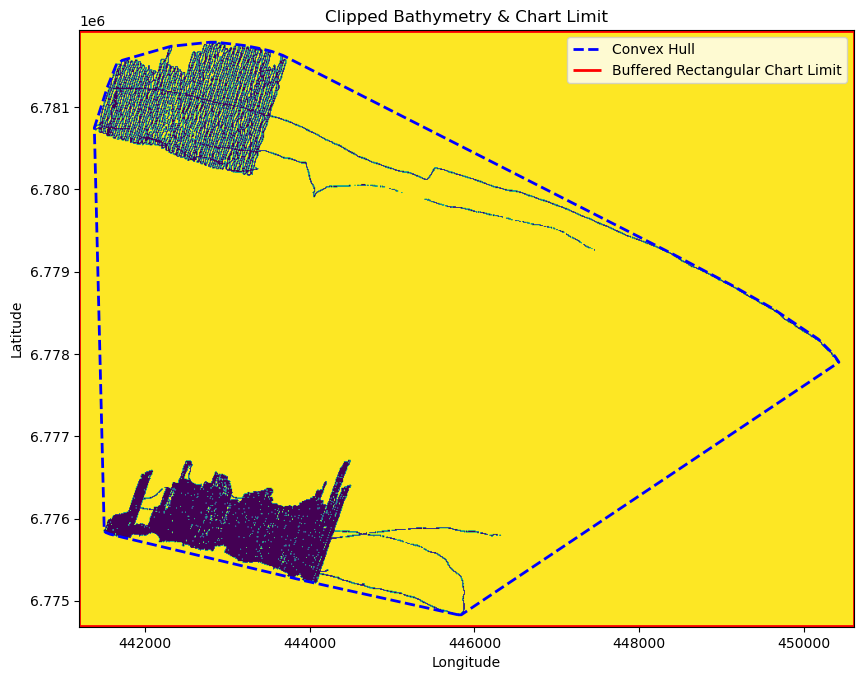

Generating visualization completed in 0.160309 seconds
Final clipped bathymetry saved at: ./output/Bathymetric_Features/reprojected_bathymetry.tif
Number of Bands: 2
NoData value: 3.4028234663852886e+38


In [20]:
### NEW CODE
# GeoTIFF Reprojection, Clipping, and Chart Limit Extraction Script
#
# This script processes bathymetry GeoTIFF data by reprojecting it, extracting valid pixels, 
# computing a convex hull, generating a rectangular buffered chart limit, clipping the reprojected 
# raster to the chart limit, and visualizing the results.
#
# Inputs:
#   - input_tif: Path to the input GeoTIFF file (bathymetry data).
#   - output_bathymetry_directory: Directory where the reprojected and clipped GeoTIFFs are saved.
#   - output_chart_directory: Directory where the chart limit GeoPackage is saved.
#
# Outputs:
#   - output_tif: Clipped & reprojected GeoTIFF file saved in the specified CRS.
#   - output_chart_geojson: GeoPackage containing the buffered rectangular chart limit.
#   - A visualization plot displaying the clipped reprojected GeoTIFF, convex hull, and final chart limit.

import rasterio
import shutil
import time
import datetime
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
from shapely.geometry import Polygon, MultiPoint, box, mapping
import geopandas as gpd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from pyproj import Transformer

sys.path.insert(1, r'./lib')
from utilities import utm_zone_from_wgs84

def load_parameters():
    """Loads parameters from the JSON file."""
    if os.path.exists(PARAMS_FILE):
        with open(PARAMS_FILE, "r") as f:
            return json.load(f)
    return {}

# Retrieve user-defined parameters
params = load_parameters()
input_tif = f'./input/{params['user_bathymetry']}'

output_bathymetry_directory = r'./output/Bathymetric_Features'
output_chart_directory = params["output_chart_dir"]
output_chart_geojson = os.path.join(output_chart_directory, 'chartlimit_utm.geojson')

output_tif = os.path.join(output_bathymetry_directory, 'reprojected_bathymetry.tif')

def log_step(step_name):
    """Logs the start time of a process."""
    start_time = datetime.datetime.now()
    print(f"{step_name}: {start_time}")
    return start_time

def log_completion(step_name, start_time):
    """Logs the completion time and duration of a process."""
    end_time = datetime.datetime.now()
    duration = (end_time - start_time).total_seconds()
    print(f"{step_name} completed in {duration:.6f} seconds")

# 1. Load and reproject the GeoTIFF (Updated to include Band 2)
start_time = log_step("Loading and reprojecting GeoTIFF")

with rasterio.open(input_tif) as src:
    bounds = src.bounds
    num_bands = src.count  # Get number of bands in input raster

    if src.crs.is_projected:
        projected_coord_system = src.crs

        ### NEW CODE
        # Instead of shutil.copyfile, explicitly create a new file with 2 bands
        kwargs = src.meta.copy()
        kwargs.update({"count": 2, "dtype": "float32"})  # Ensure 2 bands

        # Read Band 1 from input before opening output in write mode
        bathymetry_data = src.read(1)

        with rasterio.open(output_tif, 'w', **kwargs) as dst:
            dst.write(bathymetry_data, indexes=1)  # Write Band 1

            # Create Band 2 (Mark valid data as 1, NoData elsewhere)
            band_2 = np.ones((dst.height, dst.width), dtype=np.float32) * kwargs['nodata']
            valid_mask = bathymetry_data != kwargs['nodata']
            band_2[valid_mask] = 1  # Mark valid bathymetry data
            dst.write(band_2, indexes=2)  # Write Band 2

        print(f"Band 2 added to copied raster: {output_tif}")
        ### NEW CODE

    else:
        # Reprojection required
        input_source_centroid_x = (bounds.left + bounds.right) / 2
        input_source_centroid_y = (bounds.top + bounds.bottom) / 2
        projected_coord_system = utm_zone_from_wgs84(input_source_centroid_y, input_source_centroid_x)

        transform, width, height = calculate_default_transform(
            src.crs, projected_coord_system, src.width, src.height, *src.bounds)

        kwargs = src.meta.copy()
        kwargs.update({
            'crs': projected_coord_system,
            'transform': transform,
            'width': width,
            'height': height,
            'count': 2,  # Ensure 2 bands
            'dtype': 'float32'  # Ensure NoData consistency
        })

        with rasterio.open(output_tif, 'w', **kwargs) as dst:
            for i in range(1, min(num_bands, 2) + 1):  # Reproject Band 1 (and Band 2 if it exists)
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=projected_coord_system,
                    resampling=Resampling.nearest
                )

            ### NEW CODE
            # Ensure Band 2 is created if it wasn't in the original file
            band_2 = np.ones((height, width), dtype=np.float32) * kwargs['nodata']
            bathymetry_data = dst.read(1)  # Read Band 1
            valid_mask = bathymetry_data != kwargs['nodata']
            band_2[valid_mask] = 1  # Mark valid bathymetry data

            dst.write(band_2, indexes=2)  # Write Band 2
            print(f"Band 2 added during reprojection: {output_tif}")
            ### NEW CODE

log_completion("Loading and reprojecting GeoTIFF with Band 2", start_time)
print(f"Reprojected bathymetry with Band 2 saved at: {output_tif}")

with rasterio.open(output_tif) as src:
    print(f"Number of Bands: {src.count}")  # Should be 2

# 2. Extract valid bathymetry pixels
start_time = log_step("Extracting valid bathymetry pixels")
with rasterio.open(output_tif) as src:
    bathymetry_data = src.read(1)
    transform = src.transform

    nodata_value = src.nodata
    if nodata_value is not None:
        valid_mask = (bathymetry_data != nodata_value) & ~np.isnan(bathymetry_data)
    else:
        valid_mask = ~np.isnan(bathymetry_data)

    rows, cols = np.where(valid_mask)
    bathymetry_points = [src.xy(row, col) for row, col in zip(rows, cols)]

log_completion("Extracting valid bathymetry pixels", start_time)

# 3. Apply Delaunay triangulation and compute convex hull
start_time = log_step("Computing convex hull from bathymetry points")
tri = Delaunay(np.array(bathymetry_points))
tri_vertices = [bathymetry_points[i] for simplex in tri.simplices for i in simplex]
convex_hull_polygon = MultiPoint(tri_vertices).convex_hull
log_completion("Computing convex hull from bathymetry points", start_time)

# 4. Compute a rectangular bounding box and apply a buffer
start_time = log_step("Generating buffered rectangular chart limit")
minx, miny, maxx, maxy = convex_hull_polygon.bounds

# Create a manually expanded bounding box (no rounded corners)
buffer_x = 0.02 * (maxx - minx)
buffer_y = 0.02 * (maxy - miny)
chart_limit_polygon = box(minx - buffer_x, miny - buffer_y, maxx + buffer_x, maxy + buffer_y)

log_completion("Generating buffered rectangular chart limit", start_time)

# 5. Save the chart limit as a GeoPackage
start_time = log_step(f"Saving chart limit to {output_chart_geojson}")
chart_limit_gdf = gpd.GeoDataFrame({"id": [1]}, geometry=[chart_limit_polygon], crs=projected_coord_system)
if os.path.exists(output_chart_geojson):
    os.remove(output_chart_geojson)
chart_limit_gdf.to_file(output_chart_geojson, driver="GeoJSON")
log_completion(f"Saving chart limit to {output_chart_geojson}", start_time)

# 6. Clip the reprojected bathymetry to the chart limit
start_time = log_step("Clipping bathymetry to chart limit")
with rasterio.open(output_tif) as src:
    clipped_image, clipped_transform = mask(src, [mapping(chart_limit_polygon)], crop=True, nodata=src.nodata)
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "transform": clipped_transform,
        "width": clipped_image.shape[2],
        "height": clipped_image.shape[1],
        "compress": "deflate"  # Use "lzw" or "jpeg" for other cases
    })

    with rasterio.open(output_tif, 'w', **clipped_meta) as dst:
        dst.write(clipped_image)

log_completion("Clipping bathymetry to chart limit", start_time)

# 7. Visualization
start_time = log_step("Generating visualization")
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(output_tif) as src_reproj:
    raster_data = src_reproj.read(1)
    raster_data = np.nan_to_num(raster_data, nan=0.0, posinf=0.0, neginf=0.0)
    raster_data = np.clip(raster_data, np.percentile(raster_data, 1), np.percentile(raster_data, 99))
    show(raster_data, ax=ax, transform=src_reproj.transform)

gpd.GeoDataFrame(geometry=[convex_hull_polygon], crs=projected_coord_system).boundary.plot(
    ax=ax, color='blue', linewidth=2, linestyle="--", label="Convex Hull"
)

chart_limit_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label="Buffered Rectangular Chart Limit")

ax.set_title("Clipped Bathymetry & Chart Limit")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()
log_completion("Generating visualization", start_time)

print(f"Final clipped bathymetry saved at: {output_tif}")
with rasterio.open(output_tif) as src:
    print(f"Number of Bands: {src.count}")  # Should be 2
print(f"NoData value: {rasterio.open(output_tif).nodata}")

Reprojected raster saved as: ./output/Bathymetric_Features/reprojected_bathymetry_4326.tif
Clipped raster saved as: ./output/Bathymetric_Features/clipped_gebco.tif
Bounding Box Values:
Longitude (X-axis): x_min = -94.09304857372604, x_max = -93.91613758283076
Latitude (Y-axis): y_min = 61.10248997635345, y_max = 61.16879203823639
Computed X-range: 0.17691099089527995
Computed Y-range: 0.06630206188293641
Applied Axis Limits:
X-axis limits: (-94.09304857372604, -93.91613758283076)
Y-axis limits: (61.10248997635345, 61.16879203823639)


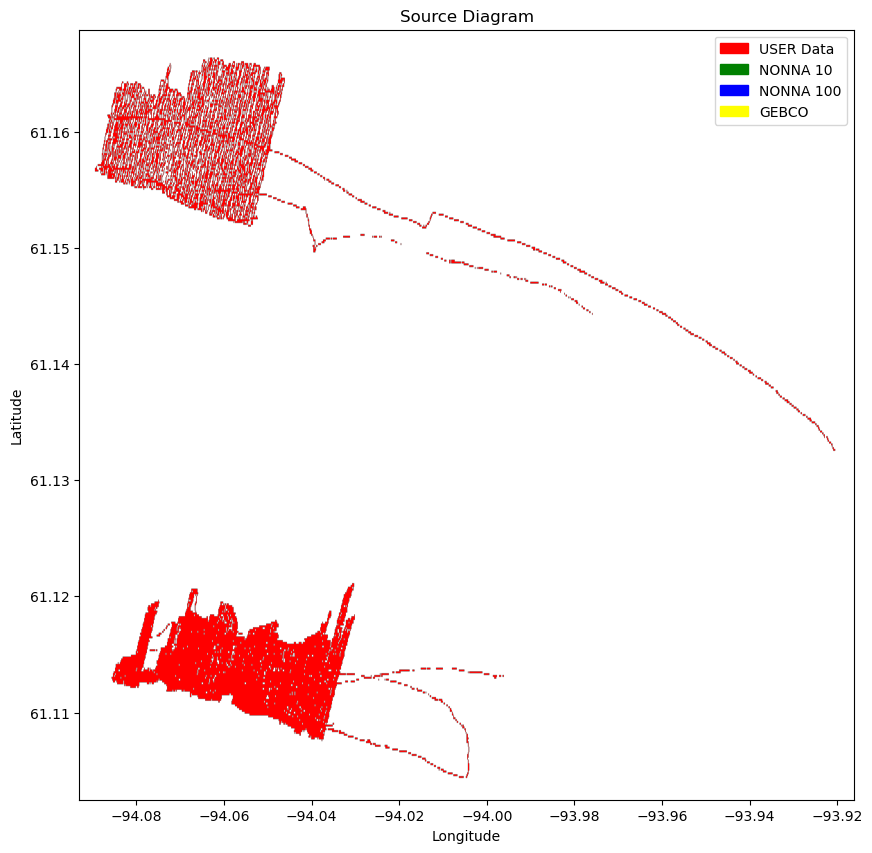

Figure Size: [10. 10.]
Aspect Ratio (expected Y stretch): auto
Plot saved as: ./output/Bathymetric_Features/bathymetry_plot.png


In [21]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject
from matplotlib.patches import Patch

# Define file paths
input_tiff = "./output/Bathymetric_Features/reprojected_bathymetry.tif"
reprojected_tiff = "./output/Bathymetric_Features/reprojected_bathymetry_4326.tif"
clip_geojson = "./output/Chart_Features/chartlimit_utm.geojson"
clipped_tiff = "./output/Bathymetric_Features/clipped_gebco.tif"
output_image = "./output/Bathymetric_Features/bathymetry_plot.png"

COMMON_NODATA_VALUE = -9999  # Ensure a consistent NoData value

# Step 1: Reproject the Raster to EPSG:4326 (Preserve NoData)
def reproject_raster(input_tif, output_tif, dst_crs="EPSG:4326"):
    with rasterio.open(input_tif) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)

        new_meta = src.meta.copy()
        new_meta.update({
            "crs": dst_crs,
            "transform": transform,
            "width": width,
            "height": height,
            "nodata": COMMON_NODATA_VALUE
        })

        with rasterio.open(output_tif, "w", **new_meta) as dst:
            band2_reprojected = np.full((height, width), COMMON_NODATA_VALUE, dtype=np.float32)

            reproject(
                source=rasterio.band(src, 2),
                destination=band2_reprojected,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
                dst_nodata=COMMON_NODATA_VALUE
            )

            dst.write(band2_reprojected, 1)

    print(f"Reprojected raster saved as: {output_tif}")

# Step 2: Clip the Raster Using Boundary
def clip_raster(input_tif, clip_geojson, output_tif):
    clip_boundary = gpd.read_file(clip_geojson)

    with rasterio.open(input_tif) as dataset:
        raster_crs = dataset.crs
        raster_bounds = dataset.bounds

        if clip_boundary.crs != raster_crs:
            clip_boundary = clip_boundary.to_crs(raster_crs)

        clip_bounds = clip_boundary.total_bounds

        if (raster_bounds.right < clip_bounds[0] or  
            raster_bounds.left > clip_bounds[2] or   
            raster_bounds.top < clip_bounds[1] or    
            raster_bounds.bottom > clip_bounds[3]):  

            print("Warning: Clipping boundary does NOT overlap with raster! Skipping clipping.")
            return input_tif  

        else:
            clip_geometry = [geom.__geo_interface__ for geom in clip_boundary.geometry]
            clipped_data, clipped_transform = mask(dataset, clip_geometry, crop=True, nodata=COMMON_NODATA_VALUE)

            clipped_data[clipped_data == dataset.nodata] = COMMON_NODATA_VALUE  

            clipped_meta = dataset.meta.copy()
            clipped_meta.update({
                "driver": "GTiff",
                "height": clipped_data.shape[1],
                "width": clipped_data.shape[2],
                "transform": clipped_transform,
                "nodata": COMMON_NODATA_VALUE
            })

            with rasterio.open(output_tif, "w", **clipped_meta) as dest:
                dest.write(clipped_data)

            print(f"Clipped raster saved as: {output_tif}")

    return output_tif  

# Step 3: Execute Reprojection & Clipping
reproject_raster(input_tiff, reprojected_tiff)
clipped_tiff = clip_raster(reprojected_tiff, clip_geojson, clipped_tiff)

# Step 4: Load Clipped Raster for Visualization
with rasterio.open(clipped_tiff) as dataset:
    raster_band2 = dataset.read(1)  
    nodata_value = dataset.nodata

    raster_band2 = np.where(raster_band2 == nodata_value, np.nan, raster_band2)  

    source_colors = {
        1: "red",    
        2: "green",  
        3: "blue",   
        4: "yellow"  
    }
    source_labels = {
        1: "USER Data",
        2: "NONNA 10",
        3: "NONNA 100",
        4: "GEBCO"
    }

    color_matrix = np.zeros((raster_band2.shape[0], raster_band2.shape[1], 4))  

    for key, color in source_colors.items():
        mask = (raster_band2 == key)
        if color == "red":
            color_matrix[mask] = [1, 0, 0, 1]  
        elif color == "green":
            color_matrix[mask] = [0, 1, 0, 1]  
        elif color == "blue":
            color_matrix[mask] = [0, 0, 1, 1]  
        elif color == "yellow":
            color_matrix[mask] = [1, 1, 0, 1]  

    color_matrix[np.isnan(raster_band2)] = [0, 0, 0, 0]  

# Step 5: Plot the Image with Debugging Prints
fig, ax = plt.subplots(figsize=(10, 10))  # Force a taller figure

# Get raster bounding box
x_min, x_max = dataset.bounds.left, dataset.bounds.right
y_min, y_max = dataset.bounds.bottom, dataset.bounds.top

# Compute center and adjusted Y-range
x_range = x_max - x_min  # Correct width
y_range = (y_max - y_min) # Stretch Y twice as large as X

# Debugging Prints: Check bounding values
print(f"Bounding Box Values:")
print(f"Longitude (X-axis): x_min = {x_min}, x_max = {x_max}")
print(f"Latitude (Y-axis): y_min = {y_min}, y_max = {y_max}")
print(f"Computed X-range: {x_range}")
print(f"Computed Y-range: {y_range}")

# **Force X/Y stretching manually**
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# **Force Y to be stretched 2x more than X**
ax.set_aspect(0.5, adjustable="box")  # This locks Y stretch without cropping X

# Debugging Prints: Check applied axis limits
print(f"Applied Axis Limits:")
print(f"X-axis limits: {ax.get_xlim()}")
print(f"Y-axis limits: {ax.get_ylim()}")

# Display the image with independent X and Y scaling
ax.imshow(color_matrix, extent=[x_min, x_max, y_min, y_max], aspect='auto')

ax.set_title("Source Diagram")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Step 6: Add Legend
legend_patches = [Patch(color=source_colors[k], label=source_labels[k]) for k in source_labels.keys()]
ax.legend(handles=legend_patches, loc="upper right")

# Step 7: Save and Show
plt.savefig(output_image, dpi=300, bbox_inches="tight", transparent=True)
plt.show()

# Debugging Print: Check Figure Size and Aspect
print(f"Figure Size: {fig.get_size_inches()}")
print(f"Aspect Ratio (expected Y stretch): {ax.get_aspect()}")
print(f"Plot saved as: {output_image}")


In [23]:
import rasterio

# Define the file path
tif_path = "./output/Bathymetric_Features/reprojected_bathymetry.tif"

# Open the raster file
with rasterio.open(tif_path) as src:
    band_count = src.count  # Number of bands in the file

    print(f"Raster File: {tif_path}")
    print(f"Number of Bands: {band_count}")

    # Check if Band 2 exists
    if band_count >= 2:
        print("Band 2 is present in the raster.")
    else:
        print("Band 2 is MISSING in the raster!")


Raster File: ./output/Bathymetric_Features/reprojected_bathymetry.tif
Number of Bands: 2
Band 2 is present in the raster.


In [24]:
# 8 & 10. Calculate optimum web nautical chart scale and soundings radii (in meters, with minimum thresholds)

def calculate_optimum_scale_and_radii(chart_limit_gpkg, bathymetry_tif, target_width_px=1000, dpi=96,
                                      standard_scales=None, vertical_exaggeration=1):
    """
    Calculate the optimum chart scale based on the chart limit and compute start and end radii for the soundings.
    
    The radii are computed from the absolute depth values (in meters) multiplied by an optional vertical_exaggeration.
    Then, the start radius is rounded to the nearest 10 m (with a minimum of 10 m), and the end radius is rounded
    to the nearest 50 m (with a minimum of 50 m).
    
    Parameters:
      chart_limit_gpkg (str): File path to the chart limit GeoPackage.
      bathymetry_tif (str): File path to the reprojected & clipped bathymetry GeoTIFF.
      target_width_px (int): Target display width in pixels.
      dpi (int): Dots per inch for the display.
      standard_scales (list): List of standard nautical chart scales to snap to.
      vertical_exaggeration (float): Factor to exaggerate the depth differences.
      
    Returns:
      dict: A dictionary containing:
            - 'optimum_scale': Calculated scale denominator.
            - 'optimum_scale_rounded': Nearest standard nautical chart scale.
            - 'start_radius_m': Start radius in meters (rounded to nearest 10, min 10 m).
            - 'end_radius_m': End radius in meters (rounded to nearest 50, min 50 m).
    """
    if standard_scales is None:
        standard_scales = [10000, 20000, 40000, 80000, 100000]

    # --- Part 1: Calculate the optimum chart scale from the chart limit ---
    try:
        chart_limit_gdf = gpd.read_file(chart_limit_gpkg)
    except Exception as e:
        raise RuntimeError(f"Error reading chart limit GeoPackage: {e}")
    
    if chart_limit_gdf.empty:
        raise ValueError("The chart limit GeoDataFrame is empty.")
    
    # Compute bounding box dimensions
    minx, miny, maxx, maxy = chart_limit_gdf.total_bounds
    width_m = maxx - minx  # in meters
    height_m = maxy - miny  # in meters
    print(f"Chart limit width: {width_m:.2f} m, height: {height_m:.2f} m")
    
    # Calculate ground resolution (meters per pixel)
    ground_resolution = width_m / target_width_px
    print(f"Ground resolution: {ground_resolution:.4f} m/px")
    
    # Calculate optimum scale denominator:
    # Scale Denom = ground_resolution (m/px) * dpi * 39.37 (inches per meter)
    optimum_scale = ground_resolution * dpi * 39.37
    print(f"Calculated optimum scale denominator: 1:{int(optimum_scale)}")
    
    # Snap to the nearest standard nautical chart scale
    optimum_scale_rounded = min(standard_scales, key=lambda x: abs(x - optimum_scale))
    print(f"Rounded to nearest standard nautical chart scale: 1:{optimum_scale_rounded}")
    
    # --- Part 2: Calculate start and end radii based on soundings ---
    try:
        with rasterio.open(bathymetry_tif) as src:
            bathymetry_data = src.read(1)
            nodata_value = src.nodata
            if nodata_value is not None:
                valid_mask = (bathymetry_data != nodata_value) & ~np.isnan(bathymetry_data)
            else:
                valid_mask = ~np.isnan(bathymetry_data)
    except Exception as e:
        raise RuntimeError(f"Error reading bathymetry GeoTIFF: {e}")
    
    # Extract valid sounding values (in meters) and use absolute values
    valid_soundings = bathymetry_data[valid_mask]
    if valid_soundings.size == 0:
        raise ValueError("No valid soundings found in the bathymetry data.")
    
    abs_soundings = np.abs(valid_soundings)
    
    shallowest_depth = abs_soundings.min()
    deepest_depth = abs_soundings.max()
    print(f"Shallowest sounding (absolute depth): {shallowest_depth:.2f} m")
    print(f"Deepest sounding (absolute depth): {deepest_depth:.2f} m")
    
    # Compute the raw radii (optionally applying vertical exaggeration)
    computed_start = shallowest_depth * vertical_exaggeration
    computed_end   = deepest_depth * vertical_exaggeration

    # Round start radius to the nearest 10 m and enforce a minimum of 10 m
    start_radius_m = round(computed_start, -1)
    if start_radius_m < 10:
        start_radius_m = 10

    # Round end radius to the nearest 50 m and enforce a minimum of 50 m
    # (divide by 50, round, then multiply back)
    end_radius_m = round(computed_end / 50) * 50
    if end_radius_m < 50:
        end_radius_m = 50
    
    print(f"Optimum start radius (displayed, meters): {start_radius_m} m")
    print(f"Optimum end radius (displayed, meters): {end_radius_m} m")
    
    return {
        "optimum_scale": optimum_scale,
        "optimum_scale_rounded": optimum_scale_rounded,
        "start_radius_m": start_radius_m,
        "end_radius_m": end_radius_m
    }

# Log start time
start_time = log_step("Calculating optimum chart scale and soundings radii (in meters)")

# Execute the function; adjust vertical_exaggeration as needed (default is 1)
results = calculate_optimum_scale_and_radii(output_chart_geojson, output_tif, target_width_px=1000, dpi=96,
                                             vertical_exaggeration=1)

print("\n--- Calculation Results ---")
print(f"Optimum Scale Denom.: 1:{int(results['optimum_scale'])}")
print(f"Rounded Scale Denom.: 1:{results['optimum_scale_rounded']}")
print(f"Start Radius (meters): {results['start_radius_m']} m")
print(f"End Radius (meters): {results['end_radius_m']} m")

log_completion("Calculating optimum chart scale and soundings radii (in meters)", start_time)


Calculating optimum chart scale and soundings radii (in meters): 2025-04-16 16:58:50.924026
Chart limit width: 9412.00 m, height: 7238.40 m
Ground resolution: 9.4120 m/px
Calculated optimum scale denominator: 1:35572
Rounded to nearest standard nautical chart scale: 1:40000
Shallowest sounding (absolute depth): 0.00 m
Deepest sounding (absolute depth): 12.18 m
Optimum start radius (displayed, meters): 10 m
Optimum end radius (displayed, meters): 50 m

--- Calculation Results ---
Optimum Scale Denom.: 1:35572
Rounded Scale Denom.: 1:40000
Start Radius (meters): 10 m
End Radius (meters): 50 m
Calculating optimum chart scale and soundings radii (in meters) completed in 0.039477 seconds
